# Apex Legends Ring Prediction (still mega WIP lol)
### Given the x and y coordinates for Ring 1 and Ring 2, we want to predict the coordinates for the Final Ring.
<img src="https://user-images.githubusercontent.com/102396160/165351754-8160687e-7068-4b31-b6d9-b305e2cbdfba.png" alt="example of all rings in world's edge" width="450"/>

#### Example of a typical ring progression in World's Edge. The tan and green circles represent ring 1 and 2 respectively, and the turquoise circle represents the final ring which we want to predict.

We have 2 sets of data, circles@1.json and S16_Circles.json. 
Both files contain complete ring data for the maps World's Edge and Storm Point.
We will start by focusing just on the rings of World's Edge and using the data from S16_Circles.json

In [1]:
# import libraries as needed
import numpy as np
import pandas as pd
import math

# import models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
# load data
# input data will be in the form of (x1,y1,x2,y2), where x1, y1, refer to the coordinates of ring 1
# test output data will be in the form of (x5,y5) where x5, y5, refer to the coordinates of the final ring
data = pd.read_json('apex_data/S16_Circles.json')
#print(data.to_string())

# remove storm point
data = data.iloc[:432]

# remove stage 0s        
data = data.drop([i for i in range(len(data)) if i%6==0])

print(data.to_string())
    

                       center  radius  stage                            gameID map
1     {'x': 10772, 'y': 9657}    4369      1  6ebde863d40b8add3f1bf2a174c0cc69  we
2    {'x': 12227, 'y': 11033}    2367      2  6ebde863d40b8add3f1bf2a174c0cc69  we
3    {'x': 13099, 'y': 11230}    1457      3  6ebde863d40b8add3f1bf2a174c0cc69  we
4    {'x': 12970, 'y': 11796}     728      4  6ebde863d40b8add3f1bf2a174c0cc69  we
5    {'x': 12923, 'y': 11543}     364      5  6ebde863d40b8add3f1bf2a174c0cc69  we
7      {'x': 8644, 'y': 5902}    4369      1  88aa4acce5291017d2b665aa7447bc0e  we
8      {'x': 8170, 'y': 3956}    2367      2  88aa4acce5291017d2b665aa7447bc0e  we
9      {'x': 8864, 'y': 3371}    1456      3  88aa4acce5291017d2b665aa7447bc0e  we
10     {'x': 8307, 'y': 3145}     728      4  88aa4acce5291017d2b665aa7447bc0e  we
11     {'x': 8541, 'y': 3192}     364      5  88aa4acce5291017d2b665aa7447bc0e  we
13     {'x': 8255, 'y': 6677}    4370      1  475448ea2a5956416b21ef2310ea2fe3  we
14  

In [3]:
# create tuples (x1,y1,x2,y2) and (x5,y5)
stage12 = []
stage5 = []


lendata = len(data)

for x in range(0, lendata, 5):
    stage12.append((data.iloc[x].center['x'],data.iloc[x].center['y'],\
                    data.iloc[x+1].center['x'],data.iloc[x+1].center['y']))
    stage5.append((data.iloc[x+4].center['x'],data.iloc[x+4].center['y']))

print(stage12)
print()
print(stage5)


[(10772, 9657, 12227, 11033), (8644, 5902, 8170, 3956), (8255, 6677, 7153, 5005), (9786, 10980, 11190, 12409), (8044, 5721, 6464, 4491), (6109, 10437, 4653, 11812), (9404, 10707, 10003, 12618), (9630, 11802, 9431, 13795), (5436, 8534, 4030, 9961), (9978, 12141, 10436, 14090), (8937, 5885, 10634, 4821), (5732, 8023, 3913, 7185), (7294, 8829, 6959, 9740), (7779, 5206, 6709, 3513), (5882, 10342, 5141, 12202), (9591, 6107, 7864, 6081), (8369, 7510, 9863, 7222), (6113, 9941, 7039, 11410), (7810, 11342, 7655, 13339), (5887, 10595, 4787, 12269), (9864, 5323, 11374, 4007), (7889, 10174, 7064, 11948), (9811, 9889, 11153, 11372), (10050, 7343, 12044, 7151), (10319, 11519, 10351, 13522), (7804, 10763, 9732, 10740), (6354, 6608, 4926, 7981), (9006, 7133, 10830, 6609), (5448, 9801, 4057, 11241), (5448, 9801, 4057, 11241), (8010, 12191, 8989, 10544), (9260, 9955, 10627, 11175), (7852, 7211, 5900, 6889), (8399, 11020, 9073, 12906), (9458, 10449, 9782, 12421), (7756, 6128, 6487, 4579), (9973, 9798, 11

In [ ]:
# generate folds

'''
from sklearn.model_selection import KFold
kf = KFold()
kf.get_n_splits(stage12)

x_folds = []
y_folds = []

for i, (train_index, test_index) in enumerate(kf.split(stage12)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
'''

In [ ]:
'''
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model, stage12, stage5, cv = kf, n_jobs = -1)
print(scores)
'''

In [5]:
# generating folds manually
def make_folds(x_data, y_data, num_folds=1):
    '''Splits data into num_folds separate folds for cross-validation.
       Each fold should consist of M consecutive items from the
       original data; each fold should be the same size (we will assume 
       that  the data divides evenly by num_folds).  Every data item should 
       appear in exactly one fold.
       '''
    x_folds = list()
    y_folds = list()
    
    foldLength = (int)(len(x_data) / num_folds)
    start = 0
    for fold in range(num_folds):
        end = start + foldLength
        x_folds.append(x_data[start:end])
        y_folds.append(y_data[start:end])
        start = start + foldLength
        
    return x_folds, y_folds

k = 5
# creating folds for k-folds cross validation using k=5
x_folds, y_folds = make_folds(stage12, stage5, k)

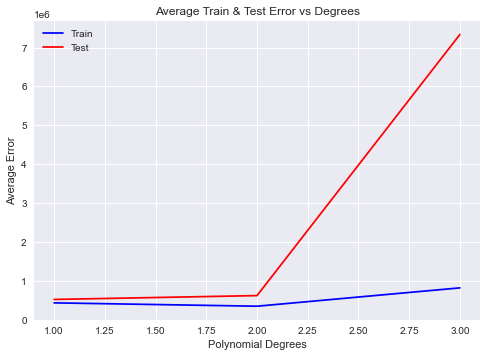

train error 
 [432131.42347355746, 346163.9056554864, 818037.8049715299] 

test error 
 [520232.7428306496, 619328.2701020847, 7339846.473479805] 



In [76]:
# Linear Regression, varying for Polynomial Fitting

k_average_train_error = list()
k_average_test_error = list()
degrees = [1, 2, 3]

for j in degrees: # perform for each degree
    mse_train = list()
    mse_test = list()
    mse = list()

    k_train_error = list()
    k_test_error = list()
    
    for i in range(k): # 5 tests
        xkTrain = list()
        ykTrain = list()
        xkTest = list()
        ykTest = list()
        for l in range(k): # split train (4 folds) and test (1 fold)
            if l == i: 
                xkTest.extend(x_folds[l])
                ykTest.extend(y_folds[l])
                
            else:
                xkTrain.extend(x_folds[l])
                ykTrain.extend(y_folds[l])
        #train        
        polyx = PolynomialFeatures(degree = j)
        xTrainpoly = polyx.fit_transform(xkTrain)
        xTestpoly = polyx.fit_transform(xkTest)
        linearRegression = linear_model.LinearRegression()
        linearRegression.fit(xTrainpoly, ykTrain)
        
        #test
        yPredict_train = linearRegression.predict(xTrainpoly)
        yPredict_test = linearRegression.predict(xTestpoly)
        mse_train = mean_squared_error(ykTrain, yPredict_train)
        mse_test = mean_squared_error(ykTest, yPredict_test)
        
        k_train_error.append(mse_train)
        k_test_error.append(mse_test)
    
    average_mse_train = np.average(k_train_error)
    average_mse_test = np.average(k_test_error)
    k_average_train_error.append(average_mse_train)
    k_average_test_error.append(average_mse_test)

plt.plot(degrees, k_average_train_error, color='blue')
plt.plot(degrees, k_average_test_error, color='red')
plt.title('Average Train & Test Error vs Degrees')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Average Error')
plt.legend(['Train', 'Test'])
plt.show()

print("train error \n", k_average_train_error, "\n")
print("test error \n", k_average_test_error, '\n')

In [32]:
# The lbfgs solver requires us to work with smaller number seemingly, 
# so we have to do some preprocessing work first

from sklearn import preprocessing

x_foldsnp = np.array(x_folds)
y_foldsnp = np.array(y_folds)

print(np.shape(x_foldsnp))
print(np.shape(y_foldsnp))


# Convert our data from a 3d array to a 2d array so that we can use the MinMaxScaler
x_foldsnp = np.reshape(x_foldsnp, (70,4))
y_foldsnp = np.reshape(y_foldsnp, (70,2))

print(np.shape(x_foldsnp))
print(np.shape(y_foldsnp))




min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x_foldsnp)
y_scaled = min_max_scaler.fit_transform(y_foldsnp)
print(x_scaled)
print(y_scaled)

x_folds_scaled, y_folds_scaled = make_folds(x_scaled, y_scaled, 5)



(5, 14, 4)
(5, 14, 2)
(70, 4)
(70, 2)
[[1.         0.64668154 0.9908235  0.71097665]
 [0.61650748 0.12311768 0.50732928 0.04188333]
 [0.54640476 0.2311768  0.38612799 0.14106079]
 [0.82231033 0.83114891 0.86723871 0.84107025]
 [0.50837989 0.09788065 0.30401621 0.09246478]
 [0.15966841 0.75543781 0.08818973 0.78462702]
 [0.75346909 0.79308422 0.72577762 0.8608301 ]
 [0.79419715 0.94576129 0.65760934 0.97210929]
 [0.03838529 0.49010039 0.01394351 0.60962466]
 [0.85691116 0.99302844 0.77738053 1.        ]
 [0.66930979 0.12074735 0.80097724 0.12366456]
 [0.09172824 0.41885109 0.         0.34716838]
 [0.3732204  0.53123257 0.36300798 0.58873026]
 [0.46062354 0.02607362 0.33321416 0.        ]
 [0.11876014 0.74219186 0.14634728 0.82149948]
 [0.78716886 0.15170106 0.47086164 0.24279096]
 [0.566949   0.34732292 0.70909308 0.35066654]
 [0.16038926 0.68627998 0.37254201 0.74662002]
 [0.46621013 0.88162298 0.445954   0.92899688]
 [0.1196612  0.77746793 0.10415922 0.82783398]
 [0.83636691 0.0423870

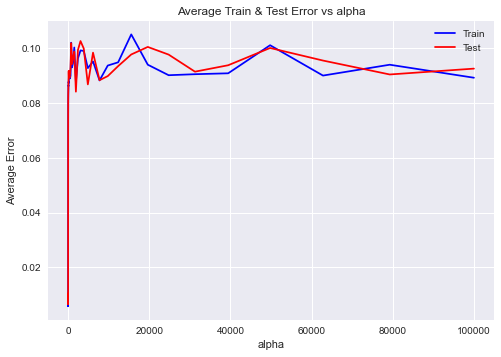

train error 
 [0.008229224107864823, 0.007813620005388228, 0.00851751678385251, 0.00706229482934085, 0.00813880189284692, 0.006266851479117959, 0.007150149500876825, 0.008114597124184041, 0.006571652678925966, 0.007489069589233588, 0.007143609133549981, 0.007619970668748199, 0.006683926221518252, 0.007734930592700633, 0.00810658545023192, 0.0077210996434659285, 0.006172723467245668, 0.007775452613904976, 0.007806603188039442, 0.006907031590197538, 0.0069966486935382375, 0.007853516548841751, 0.007615424846812574, 0.007186209895920717, 0.006862320975560732, 0.0072021126009939335, 0.006481046354718721, 0.007039546209769492, 0.006376900920051713, 0.007442291329878526, 0.007224823179294631, 0.008411374799568806, 0.006967255965961375, 0.008080337813151546, 0.006521606999061361, 0.007703786021920521, 0.007553966916011521, 0.005745183684089004, 0.006712730410158327, 0.007181102386830326, 0.006672831035920193, 0.006460157931366008, 0.007055050941230179, 0.0059555649280088425, 0.006273104860397

In [39]:
# MLP Regressor, varying for L2 alpha
# solver = adam, activation = relu

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

alphas = np.logspace(-5, 5, base=10, num=100)
k_average_train_error = list()
k_average_test_error = list()

for j in alphas: # perform for each degree
    mse_train = list()
    mse_test = list()
    mse = list()

    k_train_error = list()
    k_test_error = list()
    
    for i in range(k): # 5 tests
        xkTrain = list()
        ykTrain = list()
        xkTest = list()
        ykTest = list()
        for l in range(k): # split train (4 folds) and test (1 fold)
            if l == i: 
                xkTest.extend(x_folds_scaled[l])
                ykTest.extend(y_folds_scaled[l])
                
            else:
                xkTrain.extend(x_folds_scaled[l])
                ykTrain.extend(y_folds_scaled[l])
        #train        
        mlp = MLPRegressor(alpha = j, max_iter = 1000)
        mlp.fit(xkTrain, ykTrain)
        
        #test
        yPredict_train = mlp.predict(xkTrain)
        yPredict_test = mlp.predict(xkTest)
        mse_train = mean_squared_error(ykTrain, yPredict_train)
        mse_test = mean_squared_error(ykTest, yPredict_test)
        
        k_train_error.append(mse_train)
        k_test_error.append(mse_test)
    
    average_mse_train = np.average(k_train_error)
    average_mse_test = np.average(k_test_error)
    k_average_train_error.append(average_mse_train)
    k_average_test_error.append(average_mse_test)

plt.plot(alphas, k_average_train_error, color='blue')
plt.plot(alphas, k_average_test_error, color='red')
plt.title('Average Train & Test Error vs alpha')
plt.xlabel('alpha')
plt.ylabel('Average Error')
plt.legend(['Train', 'Test'])
plt.show()

print("train error \n", k_average_train_error, "\n")
print("test error \n", k_average_test_error, '\n')

# Conclusion: The best alpha is one that is near 0, so the default of 0.0001 is probably fine

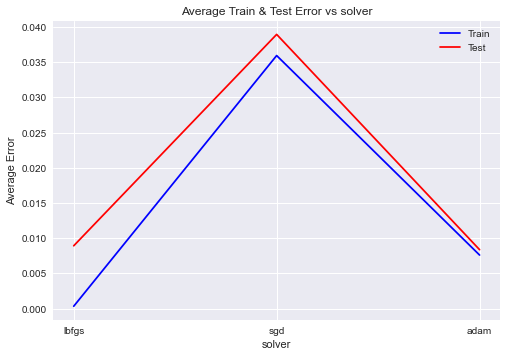

train error 
 [0.00033610577418971847, 0.03595029069916965, 0.007606486528654055] 

test error 
 [0.008923867455326076, 0.03895522597970549, 0.008371353366062586] 



In [44]:
# MLP Regressor, varying for solver
# activation = relu, alpha = 0.0001 (default), max_iter = 10000

solvers = ['lbfgs', 'sgd', 'adam']
k_average_train_error = list()
k_average_test_error = list()

for j in solvers: # perform for each degree
    mse_train = list()
    mse_test = list()
    mse = list()

    k_train_error = list()
    k_test_error = list()
    
    for i in range(k): # 5 tests
        xkTrain = list()
        ykTrain = list()
        xkTest = list()
        ykTest = list()
        for l in range(k): # split train (4 folds) and test (1 fold)
            if l == i: 
                xkTest.extend(x_folds_scaled[l])
                ykTest.extend(y_folds_scaled[l])
                
            else:
                xkTrain.extend(x_folds_scaled[l])
                ykTrain.extend(y_folds_scaled[l])
        #train        
        mlp = MLPRegressor(solver = j, activation = 'relu', alpha = 0.0001, max_iter = 10000)
        mlp.fit(xkTrain, ykTrain)
        
        #test
        yPredict_train = mlp.predict(xkTrain)
        yPredict_test = mlp.predict(xkTest)
        mse_train = mean_squared_error(ykTrain, yPredict_train)
        mse_test = mean_squared_error(ykTest, yPredict_test)
        
        k_train_error.append(mse_train)
        k_test_error.append(mse_test)
    
    average_mse_train = np.average(k_train_error)
    average_mse_test = np.average(k_test_error)
    k_average_train_error.append(average_mse_train)
    k_average_test_error.append(average_mse_test)

plt.plot(solvers, k_average_train_error, color='blue')
plt.plot(solvers, k_average_test_error, color='red')
plt.title('Average Train & Test Error vs solver')
plt.xlabel('solver')
plt.ylabel('Average Error')
plt.legend(['Train', 'Test'])
plt.show()

print("train error \n", k_average_train_error, "\n")
print("test error \n", k_average_test_error, '\n')

# Conlcusion: adam and lbfgs have similar test errors, but lbfgs has better training error (but requires max_iter = 10000). which is better?

# Update: with further testing it appears that lbfgs performs better

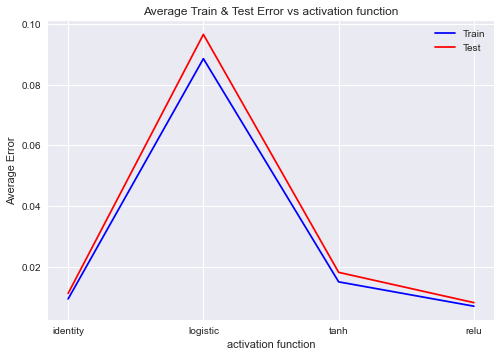

train error 
 [0.009620006975861803, 0.08850455767961132, 0.015229730561132549, 0.0072343920356408254] 

test error 
 [0.01142067041580026, 0.09647329833052476, 0.018350434158369545, 0.008408524362137397] 



In [45]:
# MLP Regressor, varying for activation
# solver = adam, alpha = 0.0001 (default), max_iter = 1000

activations = ['identity', 'logistic', 'tanh', 'relu']
k_average_train_error = list()
k_average_test_error = list()

for j in activations: # perform for each degree
    mse_train = list()
    mse_test = list()
    mse = list()

    k_train_error = list()
    k_test_error = list()
    
    for i in range(k): # 5 tests
        xkTrain = list()
        ykTrain = list()
        xkTest = list()
        ykTest = list()
        for l in range(k): # split train (4 folds) and test (1 fold)
            if l == i: 
                xkTest.extend(x_folds_scaled[l])
                ykTest.extend(y_folds_scaled[l])
                
            else:
                xkTrain.extend(x_folds_scaled[l])
                ykTrain.extend(y_folds_scaled[l])
        #train        
        mlp = MLPRegressor(solver = 'adam', activation = j, alpha = 0.0001, max_iter = 1000)
        mlp.fit(xkTrain, ykTrain)
        
        #test
        yPredict_train = mlp.predict(xkTrain)
        yPredict_test = mlp.predict(xkTest)
        mse_train = mean_squared_error(ykTrain, yPredict_train)
        mse_test = mean_squared_error(ykTest, yPredict_test)
        
        k_train_error.append(mse_train)
        k_test_error.append(mse_test)
    
    average_mse_train = np.average(k_train_error)
    average_mse_test = np.average(k_test_error)
    k_average_train_error.append(average_mse_train)
    k_average_test_error.append(average_mse_test)

plt.plot(activations, k_average_train_error, color='blue')
plt.plot(activations, k_average_test_error, color='red')
plt.title('Average Train & Test Error vs activation function')
plt.xlabel('activation function')
plt.ylabel('Average Error')
plt.legend(['Train', 'Test'])
plt.show()

print("train error \n", k_average_train_error, "\n")
print("test error \n", k_average_test_error, '\n')

# Conclusion: relu function appears to perform the best

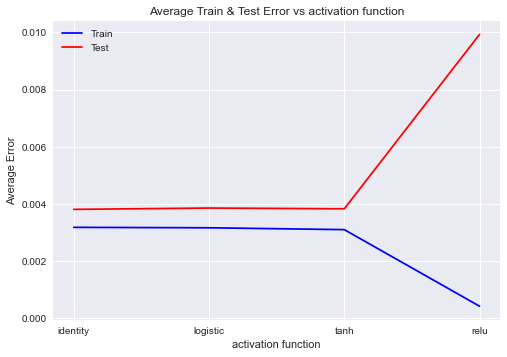

train error 
 [0.003183930789300532, 0.0031685166000886425, 0.0031040329602861306, 0.0004272136824082112] 

test error 
 [0.003812305647334463, 0.0038589048570409545, 0.003831750184901392, 0.009928272819790484] 



In [46]:
# MLP Regressor, varying for activation, trying with lbfgs
# solver = lbfgs, alpha = 0.0001 (default), max_iter = 10000

activations = ['identity', 'logistic', 'tanh', 'relu']
k_average_train_error = list()
k_average_test_error = list()

for j in activations: # perform for each degree
    mse_train = list()
    mse_test = list()
    mse = list()

    k_train_error = list()
    k_test_error = list()
    
    for i in range(k): # 5 tests
        xkTrain = list()
        ykTrain = list()
        xkTest = list()
        ykTest = list()
        for l in range(k): # split train (4 folds) and test (1 fold)
            if l == i: 
                xkTest.extend(x_folds_scaled[l])
                ykTest.extend(y_folds_scaled[l])
                
            else:
                xkTrain.extend(x_folds_scaled[l])
                ykTrain.extend(y_folds_scaled[l])
        #train        
        mlp = MLPRegressor(solver = 'lbfgs', activation = j, alpha = 0.0001, max_iter = 10000)
        mlp.fit(xkTrain, ykTrain)
        
        #test
        yPredict_train = mlp.predict(xkTrain)
        yPredict_test = mlp.predict(xkTest)
        mse_train = mean_squared_error(ykTrain, yPredict_train)
        mse_test = mean_squared_error(ykTest, yPredict_test)
        
        k_train_error.append(mse_train)
        k_test_error.append(mse_test)
    
    average_mse_train = np.average(k_train_error)
    average_mse_test = np.average(k_test_error)
    k_average_train_error.append(average_mse_train)
    k_average_test_error.append(average_mse_test)

plt.plot(activations, k_average_train_error, color='blue')
plt.plot(activations, k_average_test_error, color='red')
plt.title('Average Train & Test Error vs activation function')
plt.xlabel('activation function')
plt.ylabel('Average Error')
plt.legend(['Train', 'Test'])
plt.show()

print("train error \n", k_average_train_error, "\n")
print("test error \n", k_average_test_error, '\n')

# Conclusion: lbfgs solver with identity solver does the best so far

## todo: continue trying out different algorithms (SVM, random forest) and different preprocessing methods
### also would be helpful to look into figuring out how get new sources of ring data